In [6]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# 일별확진자 확인

In [68]:
con = pd.read_csv('./Data/corona/서울특별시 코로나19 확진자 발생동향.csv', encoding='cp949')
con

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),...,전국 퇴원,전국 사망,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자
0,2022.02.15.00,410410,12453,158289,249872,9078,2249,NaN,NaN,NaN,...,803005,7163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2022.02.14.00,397957,11599,148010,247705,9078,2242,NaN,NaN,NaN,...,792107,7102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2022.02.13.00,386358,11824,137213,246908,9078,2237,NaN,NaN,NaN,...,779720,7081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2022.02.12.00,374534,13198,128546,243761,9078,2227,NaN,NaN,NaN,...,770673,7045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2022.02.11.00,361336,11531,118679,240433,9078,2224,NaN,NaN,NaN,...,754694,7012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,20.02.09.18,10,0,10,0,0,0,459.0,45.0,414.0,...,3,0,2571.0,888.0,1683.0,0.0,0.0,0.0,0.0,NaN
739,20.02.08.18,10,0,10,0,0,0,414.0,92.0,322.0,...,2,0,1677.0,620.0,1057.0,0.0,0.0,0.0,0.0,NaN
740,20.02.07.18,10,0,10,0,0,0,322.0,115.0,207.0,...,2,0,1106.0,264.0,842.0,0.0,0.0,0.0,0.0,NaN
741,20.02.06.09,11,0,11,0,0,0,192.0,28.0,164.0,...,1,0,591.0,169.0,693.0,0.0,0.0,0.0,0.0,0.0


In [69]:
co_df = con[['서울시 기준일', '서울시 추가 확진']]
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   서울시 기준일    743 non-null    object
 1   서울시 추가 확진  743 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.7+ KB


In [70]:
for i in range(0, 743):
    co_df['서울시 기준일'][i] = co_df['서울시 기준일'][i][:-3].replace('.','-')

C:\Users\sec\AppData\Local\Temp\ipykernel_11232\3187428134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['서울시 기준일'][i] = co_df['서울시 기준일'][i][:-3].replace('.','-')


In [71]:
for i in range(720, 743):
    co_df['서울시 기준일'][i] = co_df['서울시 기준일'][i].replace('20-','2020-')

C:\Users\sec\AppData\Local\Temp\ipykernel_11232\3953419502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['서울시 기준일'][i] = co_df['서울시 기준일'][i].replace('20-','2020-')


In [72]:
co_df.columns = ['기준일', '확진자']
co_df

,기준일,확진자
0,2022-02-15,12453
1,2022-02-14,11599
2,2022-02-13,11824
3,2022-02-12,13198
4,2022-02-11,11531
...,...,...
738,2020-02-09,0
739,2020-02-08,0
740,2020-02-07,0
741,2020-02-06,0


In [73]:
co_df['스케일링'] = minmax_scale(co_df['확진자'])
# co_df = co_df.replace(0.000000, np.nan)
co_df

C:\Users\sec\AppData\Local\Temp\ipykernel_11232\103992048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['스케일링'] = minmax_scale(co_df['확진자'])


,기준일,확진자,스케일링
0,2022-02-15,12453,0.943552
1,2022-02-14,11599,0.878845
2,2022-02-13,11824,0.895893
3,2022-02-12,13198,1.000000
4,2022-02-11,11531,0.873693
...,...,...,...
738,2020-02-09,0,0.000000
739,2020-02-08,0,0.000000
740,2020-02-07,0,0.000000
741,2020-02-06,0,0.000000


In [74]:
co_df.to_excel('./Data/가공완료/[코로나]일자별_확진자수(+scale).xlsx')

### 일자별 확진자 월추가하기

In [40]:
co_df['월'] = co_df['서울시 기준일']
for i in range(0, 743):
    co_df['월'][i] = co_df['서울시 기준일'][i][:7]

C:\Users\sec\AppData\Local\Temp\ipykernel_11232\3926741061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['월'] = co_df['서울시 기준일']
C:\Users\sec\AppData\Local\Temp\ipykernel_11232\3926741061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['월'][i] = co_df['서울시 기준일'][i][:7]


In [41]:
co_df.columns = ['기준일', '확진자', '월']
co_df

,기준일,확진자,월
0,2022-02-15,12453,2022-02
1,2022-02-14,11599,2022-02
2,2022-02-13,11824,2022-02
3,2022-02-12,13198,2022-02
4,2022-02-11,11531,2022-02
...,...,...,...
738,2020-02-09,0,2020-02
739,2020-02-08,0,2020-02
740,2020-02-07,0,2020-02
741,2020-02-06,0,2020-02


# 월별확진자 스케일링

In [107]:
f = pd.read_excel('./Data/가공완료/[코로나]월별_확진자수.xlsx')
f

,월,확진자
0,2020-02,0
1,2020-03,0
2,2020-04,7
3,2020-05,228
4,2020-06,451
5,2020-07,288
6,2020-08,2267
7,2020-09,1424
8,2020-10,719
9,2020-11,2802


In [43]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [108]:
# f['스케일링'] = minmax_scale(f['확진자'])
f = f.set_index('월')
f

,확진자
월,
2020-02,0
2020-03,0
2020-04,7
2020-05,228
2020-06,451
2020-07,288
2020-08,2267
2020-09,1424
2020-10,719


In [47]:
f_1 = f[['월', '스케일링']]

In [45]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
rc('font', family = 'malgun gothic')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2160x1440 with 0 Axes>

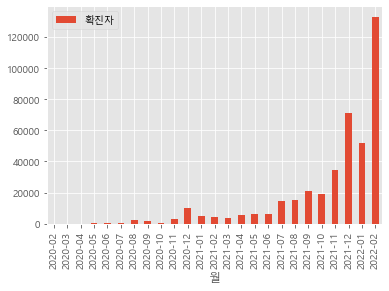

In [109]:
plt.figure(figsize = (30,20))
f.plot.bar()
# plt.xticks(list(f['스케일링']), values)

plt.legend()
plt.show

In [51]:
f_1.to_excel('./Data/가공완료/[코로나]월별_확진자수(+scale).xlsx')

# 월별 백신접종자 스케일링

In [80]:
g = pd.read_excel('./Data/가공완료/중간가공데이터/서울코로나백신현황.xlsx')
g = g.drop('Unnamed: 0', axis=1)
g

,접종일,당일 1차접종자 수,1차접종률(%),당일 2차접종자 수,2차접종률(%),당일 추가접종자 수,추가접종률(%)
0,2022.02.14,1882,88.1,1977,87.1,32816,56.8
1,2022.02.13,47,88.0,83,87.1,1334,56.5
2,2022.02.12,865,88.0,1772,87.1,26787,56.5
3,2022.02.11,1189,88.0,2819,87.1,49613,56.2
4,2022.02.10,883,88.0,1879,87.0,36839,55.6
...,...,...,...,...,...,...,...
296,2021.04.25,23323,34.2,3411,1.8,0,0.0
297,2021.04.24,200,34.2,0,1.8,0,0.0
298,2021.04.23,10195,33.6,119,1.8,0,0.0
299,2021.04.22,27074,31.0,2479,1.6,0,0.0


In [81]:
g.columns = ['접종일', '1차접종자수', '1차접종률', '2차접종자수', '2차접종률', '추가접종자수', '추가접종률']

In [82]:
g_1 = g[['접종일', '1차접종자수', '2차접종자수', '추가접종자수']]
g_1

,접종일,1차접종자수,2차접종자수,추가접종자수
0,2022.02.14,1882,1977,32816
1,2022.02.13,47,83,1334
2,2022.02.12,865,1772,26787
3,2022.02.11,1189,2819,49613
4,2022.02.10,883,1879,36839
...,...,...,...,...
296,2021.04.25,23323,3411,0
297,2021.04.24,200,0,0
298,2021.04.23,10195,119,0
299,2021.04.22,27074,2479,0


In [18]:
g_1['월'] = g_1['접종일']
for i in range(0, 301):
    g_1['월'][i] = g_1['접종일'][i][:7]

C:\Users\sec\AppData\Local\Temp\ipykernel_11232\2777555925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_1['월'] = g_1['접종일']
C:\Users\sec\AppData\Local\Temp\ipykernel_11232\2777555925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_1['월'][i] = g_1['접종일'][i][:7]


In [83]:
g_sc = g_1.copy()
g_sc['1차접종자sc'] = minmax_scale(g_sc['1차접종자수'])
g_sc['2차접종자sc'] = minmax_scale(g_sc['2차접종자수'])
g_sc['추가접종자sc'] = minmax_scale(g_sc['추가접종자수'])
g_sc

,접종일,1차접종자수,2차접종자수,추가접종자수,1차접종자sc,2차접종자sc,추가접종자sc
0,2022.02.14,1882,1977,32816,0.011134,0.009876,0.153357
1,2022.02.13,47,83,1334,0.000278,0.000415,0.006234
2,2022.02.12,865,1772,26787,0.005117,0.008852,0.125182
3,2022.02.11,1189,2819,49613,0.007034,0.014082,0.231854
4,2022.02.10,883,1879,36839,0.005224,0.009386,0.172158
...,...,...,...,...,...,...,...
296,2021.04.25,23323,3411,0,0.137977,0.017039,0.000000
297,2021.04.24,200,0,0,0.001183,0.000000,0.000000
298,2021.04.23,10195,119,0,0.060313,0.000594,0.000000
299,2021.04.22,27074,2479,0,0.160167,0.012383,0.000000


In [86]:
g_sc['접종일'] = g_sc['접종일'].str.replace('.', '-')
g_sc_num = g_sc[['접종일','1차접종자수','2차접종자수','추가접종자수']]
g_sc_num.to_excel('./Data/가공완료/[코로나]서울백신접종자수(일별)_num.xlsx')
g_sc_num

C:\Users\sec\AppData\Local\Temp\ipykernel_11232\326789311.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  g_sc['접종일'] = g_sc['접종일'].str.replace('.', '-')


,접종일,1차접종자수,2차접종자수,추가접종자수
0,2022-02-14,1882,1977,32816
1,2022-02-13,47,83,1334
2,2022-02-12,865,1772,26787
3,2022-02-11,1189,2819,49613
4,2022-02-10,883,1879,36839
...,...,...,...,...
296,2021-04-25,23323,3411,0
297,2021-04-24,200,0,0
298,2021-04-23,10195,119,0
299,2021-04-22,27074,2479,0


In [88]:
g_sc['접종일'] = g_sc['접종일'].str.replace('.', '-')
g_sc_sc = g_sc[['접종일','1차접종자sc','2차접종자sc','추가접종자sc']]
g_sc_sc.to_excel('./Data/가공완료/[코로나]서울백신접종자수(일별)_sc.xlsx')
g_sc_sc

C:\Users\sec\AppData\Local\Temp\ipykernel_11232\4219185332.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  g_sc['접종일'] = g_sc['접종일'].str.replace('.', '-')


,접종일,1차접종자sc,2차접종자sc,추가접종자sc
0,2022-02-14,0.011134,0.009876,0.153357
1,2022-02-13,0.000278,0.000415,0.006234
2,2022-02-12,0.005117,0.008852,0.125182
3,2022-02-11,0.007034,0.014082,0.231854
4,2022-02-10,0.005224,0.009386,0.172158
...,...,...,...,...
296,2021-04-25,0.137977,0.017039,0.000000
297,2021-04-24,0.001183,0.000000,0.000000
298,2021-04-23,0.060313,0.000594,0.000000
299,2021-04-22,0.160167,0.012383,0.000000


In [31]:
g_sc_gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   접종일     301 non-null    object 
 1   1차접종자수  301 non-null    float64
 2   2차접종자수  301 non-null    float64
 3   추가접종자수  301 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.5+ KB


In [33]:
g_sc_gr = g_sc_gr.replace(0.000000, np.nan)
g_sc_gr

,접종일,1차접종자수,2차접종자수,추가접종자수
0,2022-02-14,0.011134,0.009876,0.153357
1,2022-02-13,0.000278,0.000415,0.006234
2,2022-02-12,0.005117,0.008852,0.125182
3,2022-02-11,0.007034,0.014082,0.231854
4,2022-02-10,0.005224,0.009386,0.172158
...,...,...,...,...
296,2021-04-25,0.137977,0.017039,NaN
297,2021-04-24,0.001183,NaN,NaN
298,2021-04-23,0.060313,0.000594,NaN
299,2021-04-22,0.160167,0.012383,NaN


In [34]:
g_sc_gr.to_excel('./Data/가공완료/[코로나]서울백신접종자수(일별).xlsx')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

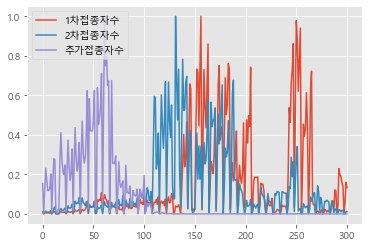

In [30]:
plt.figure(figsize = (12,8))
g_sc_gr.plot()
plt.legend()
plt.show

- minmax 스케일

In [27]:
g_sc2 = g_1.copy()
g_sc_gr2 = g_sc2.groupby('월')[['1차접종자수', '2차접종자수', '추가접종자수']].sum()
g_sc_gr2['1차접종자수'] = minmax_scale(g_sc_gr2['1차접종자수'])
g_sc_gr2['2차접종자수'] = minmax_scale(g_sc_gr2['2차접종자수'])
g_sc_gr2['추가접종자수'] = minmax_scale(g_sc_gr2['추가접종자수'])
g_sc_gr2

,1차접종자수,2차접종자수,추가접종자수
월,,,
2021-04,0.105688,0.000000,0.000000
2021-05,0.281598,0.120794,0.000000
2021-06,0.850475,0.251971,0.000000
2021-07,0.401660,0.123493,0.000000
2021-08,0.906135,0.736695,0.000000
2021-09,1.000000,0.798254,0.000000
2021-10,0.131878,1.000000,0.007803
2021-11,0.102905,0.159751,0.209369
2021-12,0.117277,0.085398,1.000000


In [28]:
g_sc_gr2.to_excel('./Data/가공완료/[코로나]서울백신접종자수(월별).xlsx')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

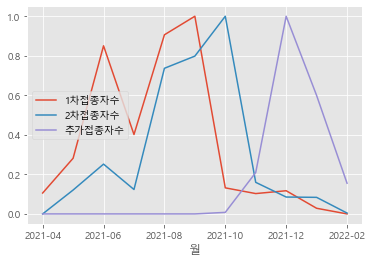

In [29]:
plt.figure(figsize = (12,8))
plt.style.use('ggplot')
g_sc_gr2.plot()
plt.legend()
plt.show

- 월별합계

In [78]:
g_sc3 = g_1.copy()
g_sc_gr3 = g_sc3.groupby('월')[['1차접종자수', '2차접종자수', '추가접종자수']].sum()
g_sc_gr3

,1차접종자수,2차접종자수,추가접종자수
월,,,
2021-04,220601,23046,0
2021-05,564992,301754,0
2021-06,1678716,604419,0
2021-07,800044,307982,0
2021-08,1787685,1722825,0
2021-09,1971450,1864860,0
2021-10,271875,2330349,21414
2021-11,215153,391639,574596
2021-12,243291,220085,2744424


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

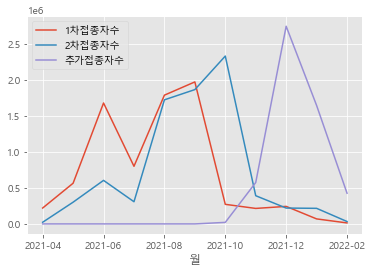

In [86]:
plt.figure(figsize = (12,8))
plt.style.use('ggplot')

# plt.hlines(g_sc_gr3['월'][6], 10, 10, color='red', linestyle='dashed', linewidth=1)

g_sc_gr3.plot()
plt.legend()
plt.show

# 백신 누적으로 처리

In [43]:
vc = pd.read_csv('./Data/corona/서울특별시 코로나19 백신 예방접종 현황.csv', encoding='cp949')
vc

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%),추가접종대상자
0,2022.02.14,9401888,1882,8280188,88.1,1977,8190187,87.1,32816.0,5344675.0,56.8,9401888.0
1,2022.02.13,9401888,47,8276991,88.0,83,8186884,87.1,1334.0,5309465.0,56.5,9401888.0
2,2022.02.12,9401888,865,8276966,88.0,1772,8186815,87.1,26787.0,5308110.0,56.5,9401888.0
3,2022.02.11,9401888,1189,8276266,88.0,2819,8185167,87.1,49613.0,5280142.0,56.2,9401888.0
4,2022.02.10,9401888,883,8274476,88.0,1879,8181700,87.0,36839.0,5229417.0,55.6,9401888.0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8,NaN,NaN,NaN,NaN
297,2021.04.24,1023346,200,350427,34.2,0,18513,1.8,NaN,NaN,NaN,NaN
298,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8,NaN,NaN,NaN,NaN
299,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6,NaN,NaN,NaN,NaN


In [44]:
list = ['접종일', '접종대상자', '1차접종 누계', '2차접종 누계','추가접종 누계']
vc_df = vc[list]
vc_df.columns = ['접종일', '접종대상자', '1차누계', '2차누계','추가누계']
vc_df

,접종일,접종대상자,1차누계,2차누계,추가누계
0,2022.02.14,9401888,8280188,8190187,5344675.0
1,2022.02.13,9401888,8276991,8186884,5309465.0
2,2022.02.12,9401888,8276966,8186815,5308110.0
3,2022.02.11,9401888,8276266,8185167,5280142.0
4,2022.02.10,9401888,8274476,8181700,5229417.0
...,...,...,...,...,...
296,2021.04.25,1023346,350631,18513,NaN
297,2021.04.24,1023346,350427,18513,NaN
298,2021.04.23,1027740,345764,18376,NaN
299,2021.04.22,1023538,317386,15901,NaN


In [45]:
vc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   접종일     301 non-null    object 
 1   접종대상자   301 non-null    int64  
 2   1차누계    301 non-null    int64  
 3   2차누계    301 non-null    int64  
 4   추가누계    126 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 11.9+ KB


In [46]:
vc_df = vc_df.fillna(0)
vc_df['추가누계'] = vc_df['추가누계'].astype('int')
vc_df

,접종일,접종대상자,1차누계,2차누계,추가누계
0,2022.02.14,9401888,8280188,8190187,5344675
1,2022.02.13,9401888,8276991,8186884,5309465
2,2022.02.12,9401888,8276966,8186815,5308110
3,2022.02.11,9401888,8276266,8185167,5280142
4,2022.02.10,9401888,8274476,8181700,5229417
...,...,...,...,...,...
296,2021.04.25,1023346,350631,18513,0
297,2021.04.24,1023346,350427,18513,0
298,2021.04.23,1027740,345764,18376,0
299,2021.04.22,1023538,317386,15901,0


In [47]:
for i in range(0, 301):
    vc_df['접종일'][i] = vc_df['접종일'][i].replace('.','-')
vc_df

C:\Users\sec\AppData\Local\Temp\ipykernel_2588\495135994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vc_df['접종일'][i] = vc_df['접종일'][i].replace('.','-')


,접종일,접종대상자,1차누계,2차누계,추가누계
0,2022-02-14,9401888,8280188,8190187,5344675
1,2022-02-13,9401888,8276991,8186884,5309465
2,2022-02-12,9401888,8276966,8186815,5308110
3,2022-02-11,9401888,8276266,8185167,5280142
4,2022-02-10,9401888,8274476,8181700,5229417
...,...,...,...,...,...
296,2021-04-25,1023346,350631,18513,0
297,2021-04-24,1023346,350427,18513,0
298,2021-04-23,1027740,345764,18376,0
299,2021-04-22,1023538,317386,15901,0


In [48]:
vc_df['월'] = vc_df['접종일']
for i in range(0, 301):
    vc_df['월'][i] = vc_df['접종일'][i][:7]

C:\Users\sec\AppData\Local\Temp\ipykernel_2588\638207560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vc_df['월'][i] = vc_df['접종일'][i][:7]


In [49]:
vc_df1 = vc_df[['월', '접종대상자', '1차누계', '2차누계', '추가누계']]
vc_df1

,월,접종대상자,1차누계,2차누계,추가누계
0,2022-02,9401888,8280188,8190187,5344675
1,2022-02,9401888,8276991,8186884,5309465
2,2022-02,9401888,8276966,8186815,5308110
3,2022-02,9401888,8276266,8185167,5280142
4,2022-02,9401888,8274476,8181700,5229417
...,...,...,...,...,...
296,2021-04,1023346,350631,18513,0
297,2021-04,1023346,350427,18513,0
298,2021-04,1027740,345764,18376,0
299,2021-04,1023538,317386,15901,0


In [50]:
vc_df.to_excel('./Data/가공완료/[코로나]서울백신누계(일별).xlsx')

In [51]:
vc_df1.to_excel('./Data/가공완료/[코로나]서울백신누계(월별).xlsx')

# 백신 스케일링 시도

In [7]:
vc_df1 = pd.read_excel('./Data/가공완료/[코로나]서울백신누계(월별).xlsx')
vc_df1 = vc_df1.drop('Unnamed: 0', axis=1)
vc_df1

,월,접종대상자,1차누계,2차누계,추가누계
0,2022-02,9401888,8280188,8190187,5344675
1,2022-02,9401888,8276991,8186884,5309465
2,2022-02,9401888,8276966,8186815,5308110
3,2022-02,9401888,8276266,8185167,5280142
4,2022-02,9401888,8274476,8181700,5229417
...,...,...,...,...,...
296,2021-04,1023346,350631,18513,0
297,2021-04,1023346,350427,18513,0
298,2021-04,1027740,345764,18376,0
299,2021-04,1023538,317386,15901,0


In [8]:
add = {'월': '2021-00', '접종대상자': 9401888, '1차누계': 9401888, '2차누계': 9401888, '추가누계': 9401888}
vc_df1 = vc_df1.append(add, ignore_index=True)
vc_df1

,월,접종대상자,1차누계,2차누계,추가누계
0,2022-02,9401888,8280188,8190187,5344675
1,2022-02,9401888,8276991,8186884,5309465
2,2022-02,9401888,8276966,8186815,5308110
3,2022-02,9401888,8276266,8185167,5280142
4,2022-02,9401888,8274476,8181700,5229417
...,...,...,...,...,...
297,2021-04,1023346,350427,18513,0
298,2021-04,1027740,345764,18376,0
299,2021-04,1023538,317386,15901,0
300,2021-04,1019322,291857,13543,0


In [9]:
vc_df1_gr = vc_df1.groupby('월')[['1차누계', '2차누계', '추가누계']].max()
vc_df1_gr = vc_df1_gr.replace(0, np.nan)
vc_df1_gr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2021-00 to 2022-02
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1차누계    12 non-null     int64  
 1   2차누계    12 non-null     int64  
 2   추가누계    6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 384.0+ bytes


In [11]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [12]:
vc_df1_gr['1차누계'] = minmax_scale(vc_df1_gr['1차누계'])
vc_df1_gr['2차누계'] = minmax_scale(vc_df1_gr['2차누계'])
vc_df1_gr['추가누계'] = minmax_scale(vc_df1_gr['추가누계'])
vc_df1_gr

,1차누계,2차누계,추가누계
월,,,
2021-00,1.000000,1.000000,1.000000
2021-04,0.000000,0.000000,NaN
2021-05,0.053670,0.031771,NaN
2021-06,0.261620,0.096675,NaN
2021-07,0.352012,0.138159,NaN
2021-08,0.551662,0.312168,NaN
2021-09,0.772872,0.507168,NaN
2021-10,0.807587,0.771756,0.000000
2021-11,0.833941,0.816078,0.060690


In [13]:
vc_df1_gr = vc_df1_gr.drop('2021-00', axis=0)
vc_df1_gr

,1차누계,2차누계,추가누계
월,,,
2021-04,0.000000,0.000000,NaN
2021-05,0.053670,0.031771,NaN
2021-06,0.261620,0.096675,NaN
2021-07,0.352012,0.138159,NaN
2021-08,0.551662,0.312168,NaN
2021-09,0.772872,0.507168,NaN
2021-10,0.807587,0.771756,0.000000
2021-11,0.833941,0.816078,0.060690
2021-12,0.865129,0.843987,0.358007


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 864x576 with 0 Axes>

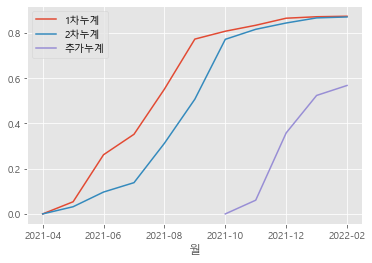

In [109]:
plt.figure(figsize = (12,8))
vc_df1_gr.plot()
plt.legend()
plt.show